|<img style="float:left;" src="http://pierreproulx.espaceweb.usherbrooke.ca/images/usherb_transp.gif"> |Pierre Proulx, ing, professeur|
|:---|:---|
|Département de génie chimique et de génie biotechnologique |** GCH200-Phénomènes d'échanges I **|


### Section18.7, Difffusion et réaction dans un catalyseur poreux sphérique

<img src='http://pierreproulx.espaceweb.usherbrooke.ca/images/Chap-18-Section-18-7.png'>

Voir les hypothèses dans le livre de Transport Phenomena.


In [4]:
#
# Pierre Proulx
#
# Préparation de l'affichage et des outils de calcul symbolique
#
import sympy as sp
from IPython.display import *
sp.init_printing(use_latex=True)
%matplotlib inline

In [5]:
# Paramètres, variables et fonctions
r,delta_r,R,k_1,a,D_A,C_AR=sp.symbols('r,delta_r,R,k_1,a,D_A,C_AR')                                                            
N_A=sp.symbols('N_A')
C_A=sp.Function('C_A')(r)   
f=sp.Function('f')(r)

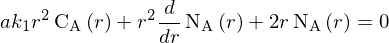

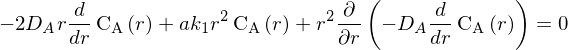

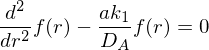

In [6]:
#
# Résultat du bilan sur une coquille sphérique
#
eq=sp.Eq(sp.diff(N_A(r)*r**2,r)+k_1*a*C_A*r**2,0)
display(eq)
eq=eq.subs(N_A(r),-D_A*sp.diff(C_A))
display(eq)
### suggestion de transformation faite dans Bird pour solutionner
eqt=sp.Eq(f.diff(r,r)-k_1*a/D_A*f,0)
display(eqt)

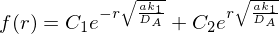

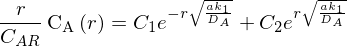

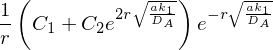

In [110]:
t=sp.dsolve(eqt)
display(t)
display(t.subs(f,C_A/C_AR*r))         # car f = r * C_A/C_AR
C=sp.symbols('C')   # C est défini comme C_A/C_AR ici
C=(t.rhs/r).simplify()
display(C)                    # cette expression doit être équivalente à 18-7.8

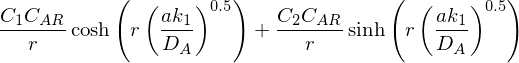

In [111]:
#
# Solution après transformation, avant les conditions aux limites (annexe C-1)
#
C1,C2=sp.symbols('C1,C2')
C_A=C_AR*C1/r*sp.cosh((k_1*a/D_A)**0.5*r)+C_AR*C2/r*sp.sinh((k_1*a/D_A)**0.5*r)
display(C_A)

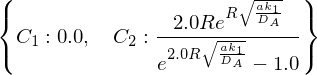

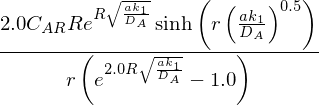

In [112]:
#C_A=C_A.subs(sp.symbols('C1'),0) 
cl1=r**2*sp.diff(C_A,r)   
cl1=sp.cancel(cl1) #pour faire effectuer les multiplications et divisions de r et r2
cl1=cl1.subs(r,0)
cl2=sp.Eq(C_A.subs(r,R)-C_AR,0)    # à la surface, C_A = C_AR
cl2=cl2.lhs
constantes=sp.solve([cl1,cl2],sp.symbols('C1 C2'))
display(constantes)
C_A=C_A.subs(constantes)
display(sp.simplify(C_A))

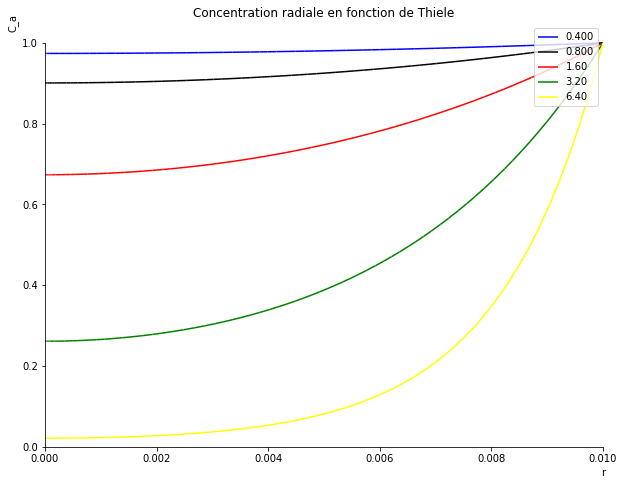

In [113]:
#
# Tracer le profil pour différentes valeurs de la constante de réaction
#
dico1={'C_AR':1,'D_A':1.e-7,'R':0.01,'a':16,'k_1':1.e-5}
Thiele1=((k_1*a/D_A)**(0.5)*R).subs(dico1).evalf(3)
C_A1=C_A.subs(dico1)
dico2={'C_AR':1,'D_A':1.e-7,'R':0.01,'a':16,'k_1':4.e-5}
Thiele2=((k_1*a/D_A)**(0.5)*R).subs(dico2).evalf(3)
C_A2=C_A.subs(dico2)
dico3={'C_AR':1,'D_A':1.e-7,'R':0.01,'a':16,'k_1':16.e-5}
Thiele3=((k_1*a/D_A)**(0.5)*R).subs(dico3).evalf(3)
C_A3=C_A.subs(dico3)
dico4={'C_AR':1,'D_A':1.e-7,'R':0.01,'a':16,'k_1':64.e-5}
Thiele4=((k_1*a/D_A)**(0.5)*R).subs(dico4).evalf(3)
C_A4=C_A.subs(dico4)
dico5={'C_AR':1,'D_A':1.e-7,'R':0.01,'a':16,'k_1':256.e-5}
Thiele5=((k_1*a/D_A)**(0.5)*R).subs(dico5).evalf(3)
C_A5=C_A.subs(dico5)
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=10,8
p = sp.plot((C_A1,(r,0,0.01)),(C_A2,(r,0,0.01)),(C_A3,(r,0,0.01)),(C_A4,(r,0,0.01)),(C_A5,(r,0,0.01)),
            legend=True, title='Concentration radiale en fonction de Thiele',
            xlabel='r',ylabel='C_a',show=False) 
p[0].line_color = 'blue'
p[0].label=str(Thiele1)
p[1].line_color = 'black'
p[1].label=str(Thiele2)
p[2].line_color = 'red'
p[2].label=str(Thiele3)
p[3].line_color = 'green'
p[3].label=str(Thiele4)
p[4].line_color = 'yellow'
p[4].label=str(Thiele5)
p.show()